In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)

from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.svm import SVC


from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install category-encoders


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv(r"data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape 

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Manual mapping

In [6]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})


In [7]:
df = df.drop(columns=['id'])

In [8]:
df['Region_Code'] = df['Region_Code'].astype('category') # Treating high-cardinality labels as categorical
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('category')# Treating high-cardinality labels as categorical
df['Response'] = df['Response'].astype('category')
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')

**after doing binary mapping, we will be having gender, vehicle_damage, age, annual_premium, vintage, driving_license, previiously insured as integers**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  int64   
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  int64   
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  int64   
 5   Vehicle_Age           381109 non-null  category
 6   Vehicle_Damage        381109 non-null  int64   
 7   Annual_Premium        381109 non-null  float64 
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  category
dtypes: category(4), float64(1), int64(6)
memory usage: 22.2 MB


**Gender, Driving_License, Region_Code, Vehicle_Age, Previously_Insured, Vehicle_Damage, Policy_Sales_Channel
all indicate categories**

**So, we need to use them in Categorical Univariate Analysis**

**UNIVARITE - CATEGORICAL - COUNT PLOT**

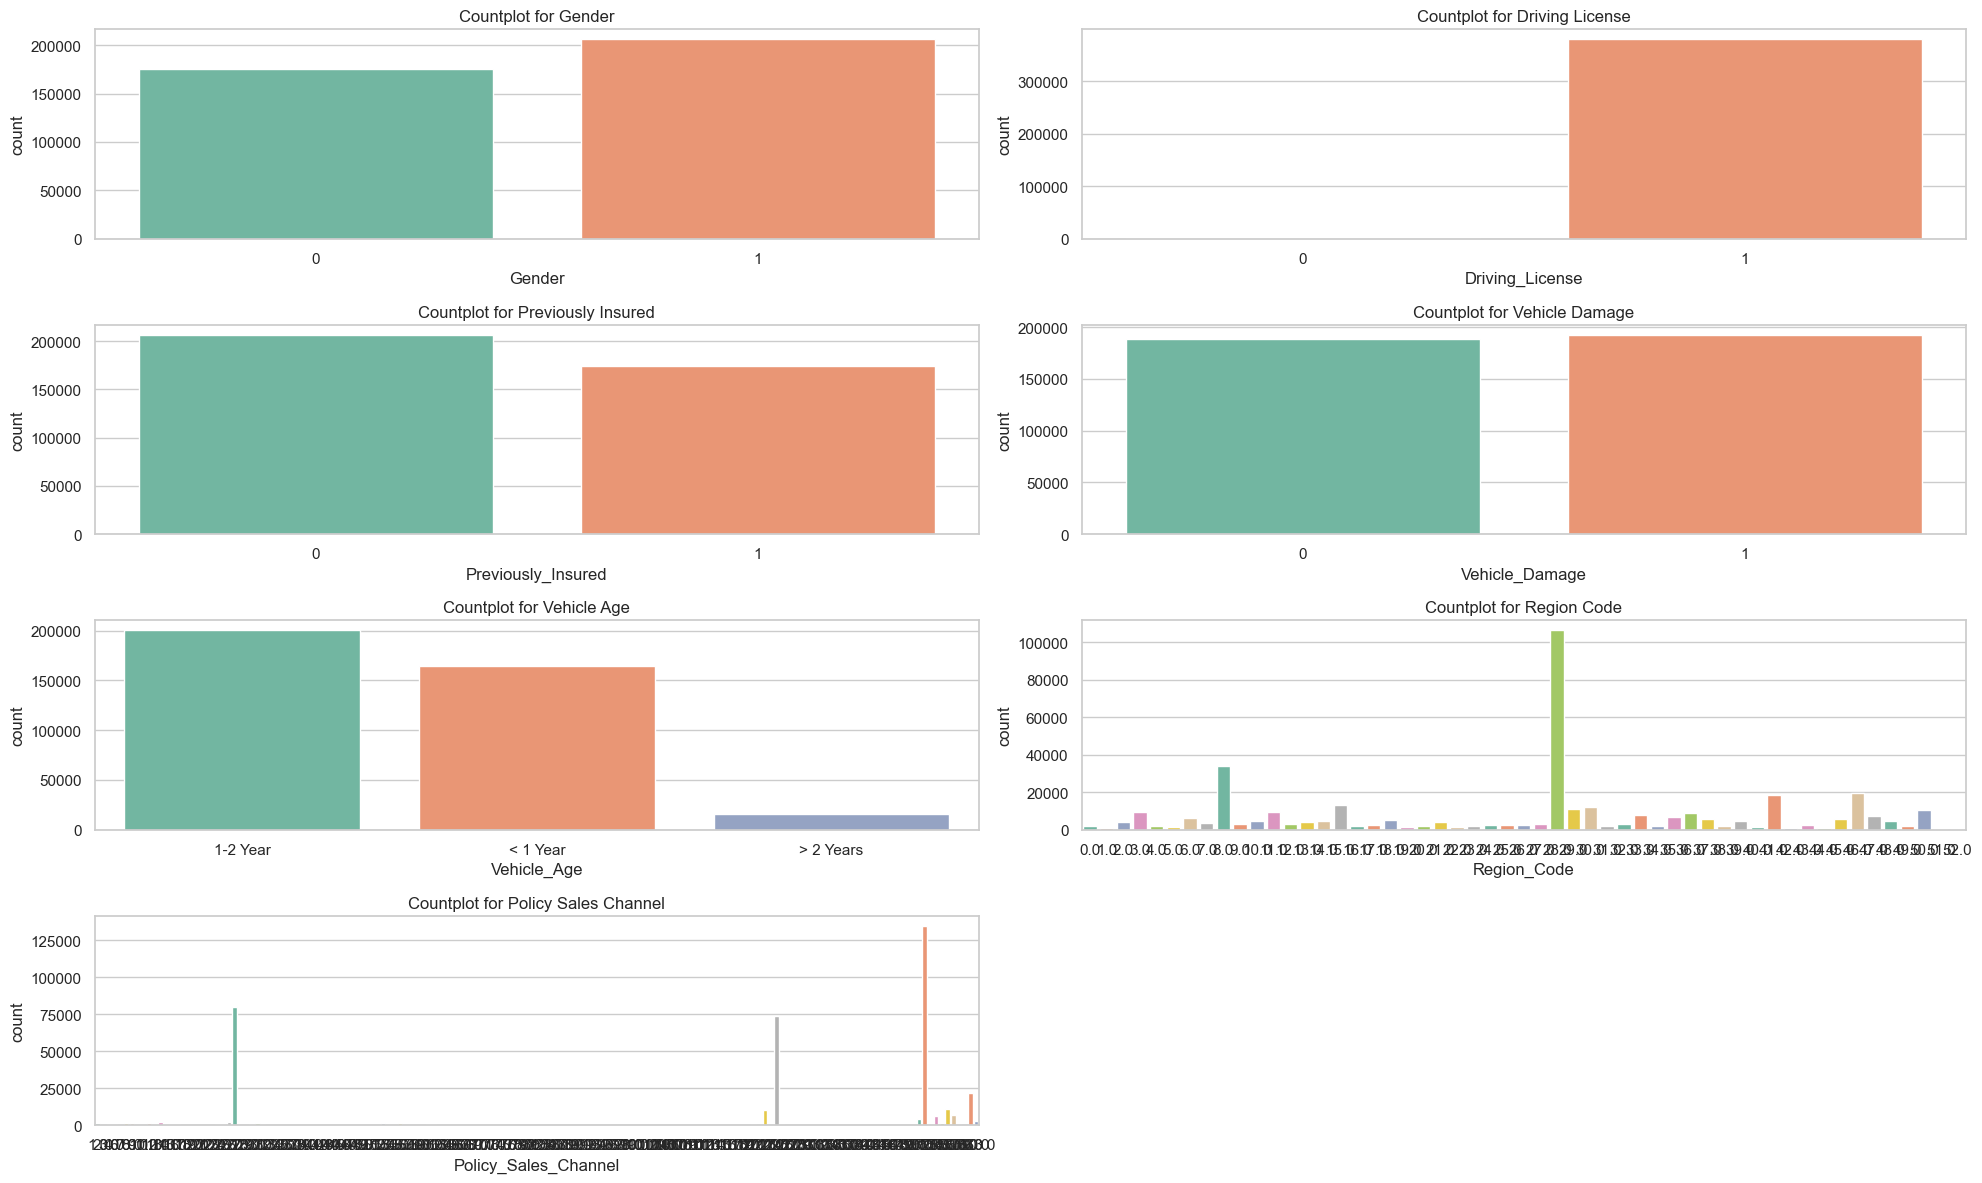

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(20, 12))

# Row 1
sns.countplot(data=df, x='Gender', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Countplot for Gender')

sns.countplot(data=df, x='Driving_License', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Countplot for Driving License')

# Row 2
sns.countplot(data=df, x='Previously_Insured', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Countplot for Previously Insured')

sns.countplot(data=df, x='Vehicle_Damage', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Countplot for Vehicle Damage')

# Row 3
sns.countplot(data=df, x='Vehicle_Age', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Countplot for Vehicle Age')

sns.countplot(data=df, x='Region_Code', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot for Region Code')

# Row 4
sns.countplot(data=df, x='Policy_Sales_Channel', ax=axes[3, 0], palette='Set2')
axes[3, 0].set_title('Countplot for Policy Sales Channel')

# Empty subplot
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()


**UNIVARIATE - NUMERICAL FEATURES - HISTOGRAM**

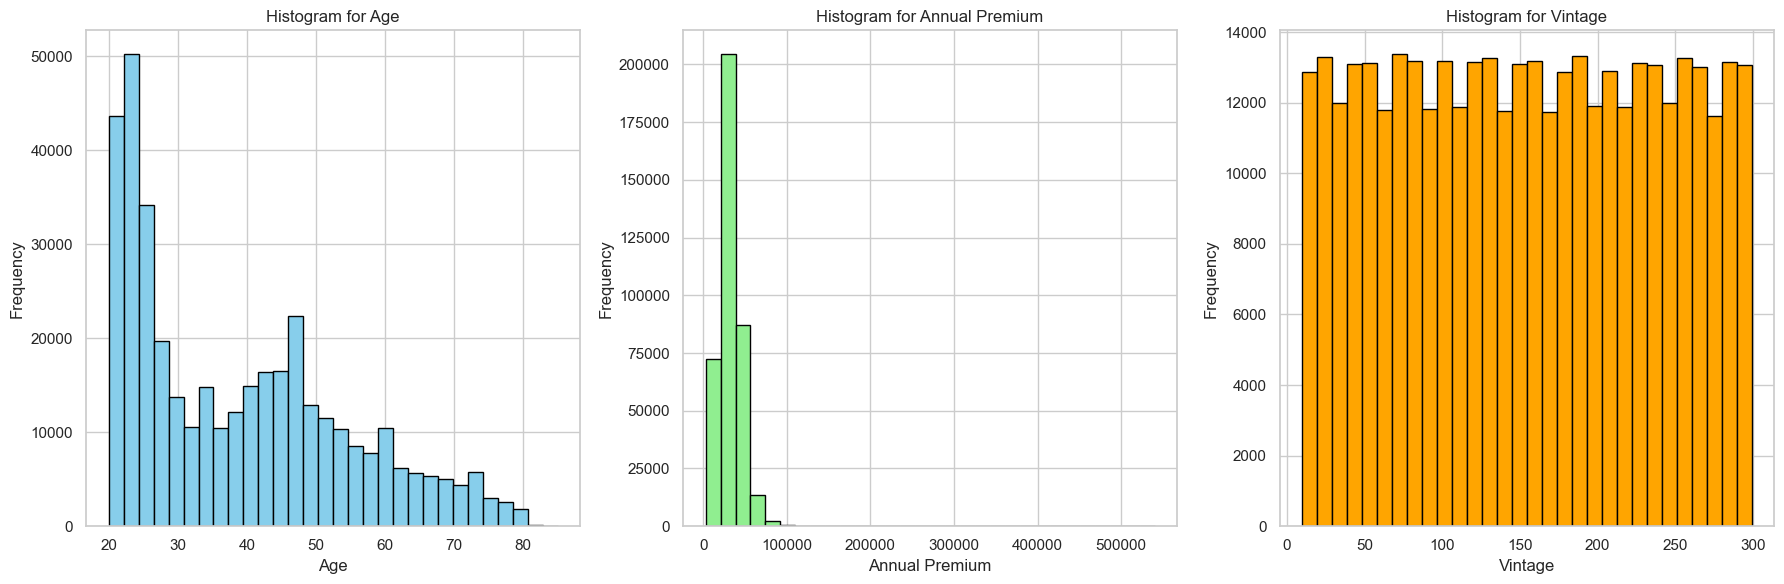

In [11]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1: Age
axes[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram 2: Annual Premium
axes[1].hist(df['Annual_Premium'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for Annual Premium')
axes[1].set_xlabel('Annual Premium')
axes[1].set_ylabel('Frequency')

# Histogram 3: Vintage
axes[2].hist(df['Vintage'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for Vintage')
axes[2].set_xlabel('Vintage')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**BIVARIATE -SCATTER PLOT**

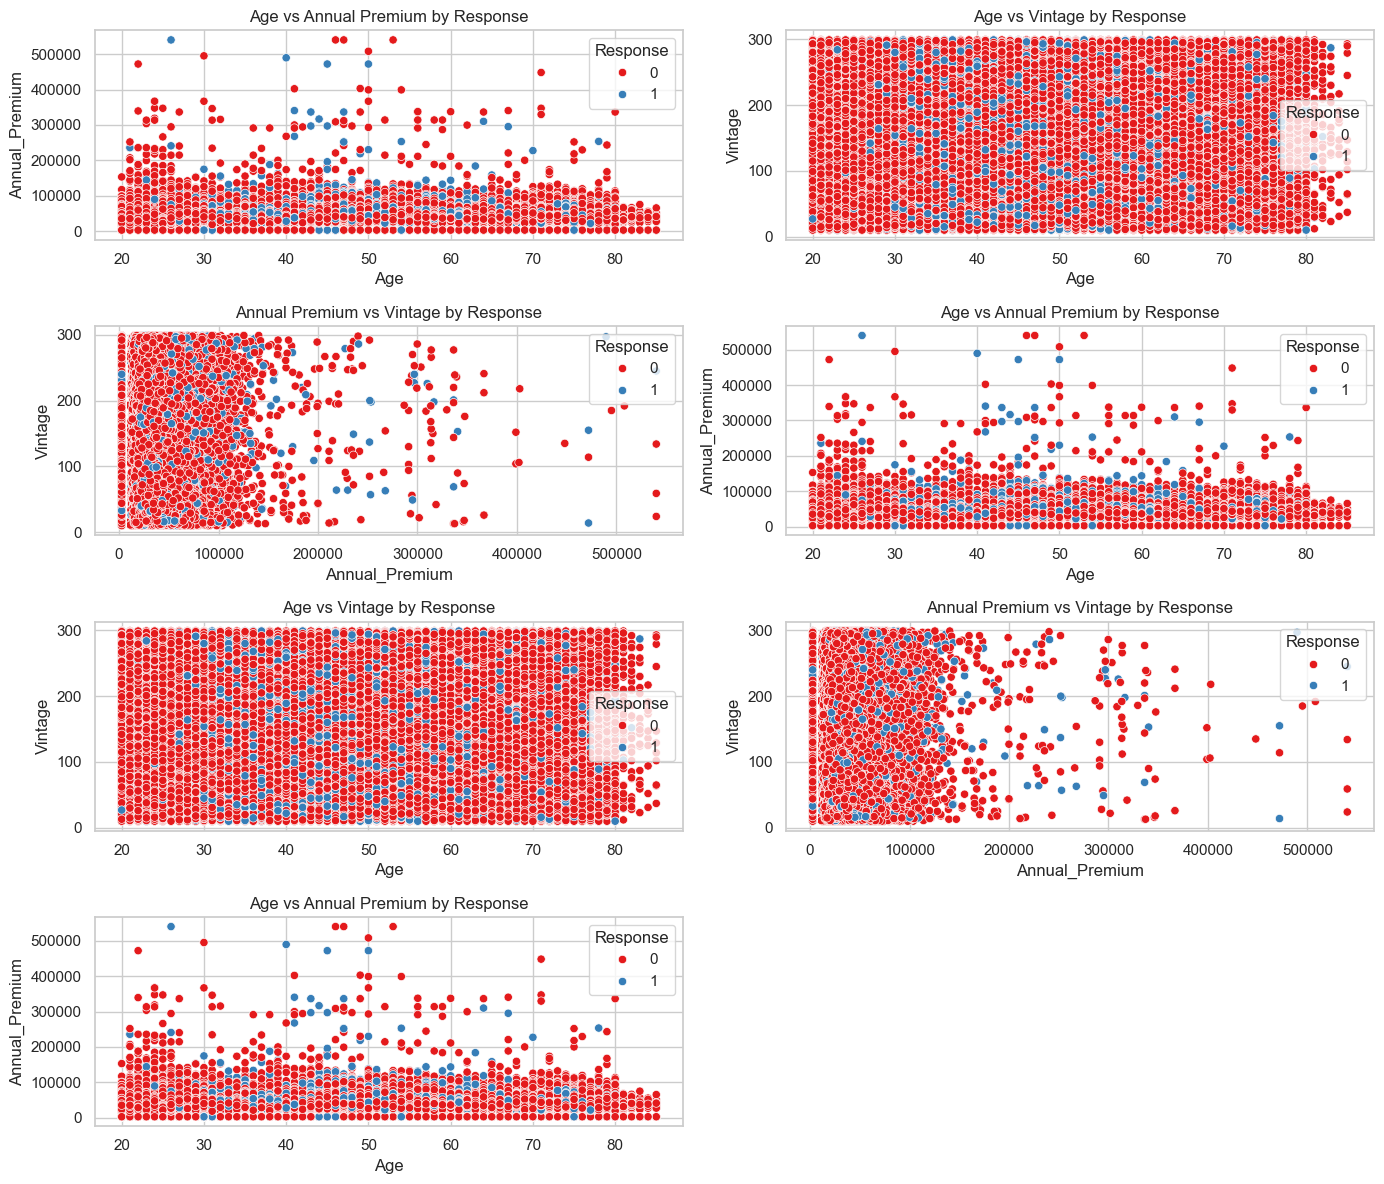

In [12]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(14, 12))

sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title("Age vs Annual Premium by Response")

sns.scatterplot(x='Age', y='Vintage', hue='Response', data=df, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title("Age vs Vintage by Response")

sns.scatterplot(x='Annual_Premium', y='Vintage', hue='Response', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title("Annual Premium vs Vintage by Response")

sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title("Age vs Annual Premium by Response")

sns.scatterplot(x='Age', y='Vintage', hue='Response', data=df, ax=axes[2, 0], palette='Set1')
axes[2, 0].set_title("Age vs Vintage by Response")

sns.scatterplot(x='Annual_Premium', y='Vintage', hue='Response', data=df, ax=axes[2, 1], palette='Set1')
axes[2, 1].set_title("Annual Premium vs Vintage by Response")

sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=df, ax=axes[3, 0], palette='Set1')
axes[3, 0].set_title("Age vs Annual Premium by Response")

# Remove unused subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()


**BIVARIATE - BOX PLOTS**

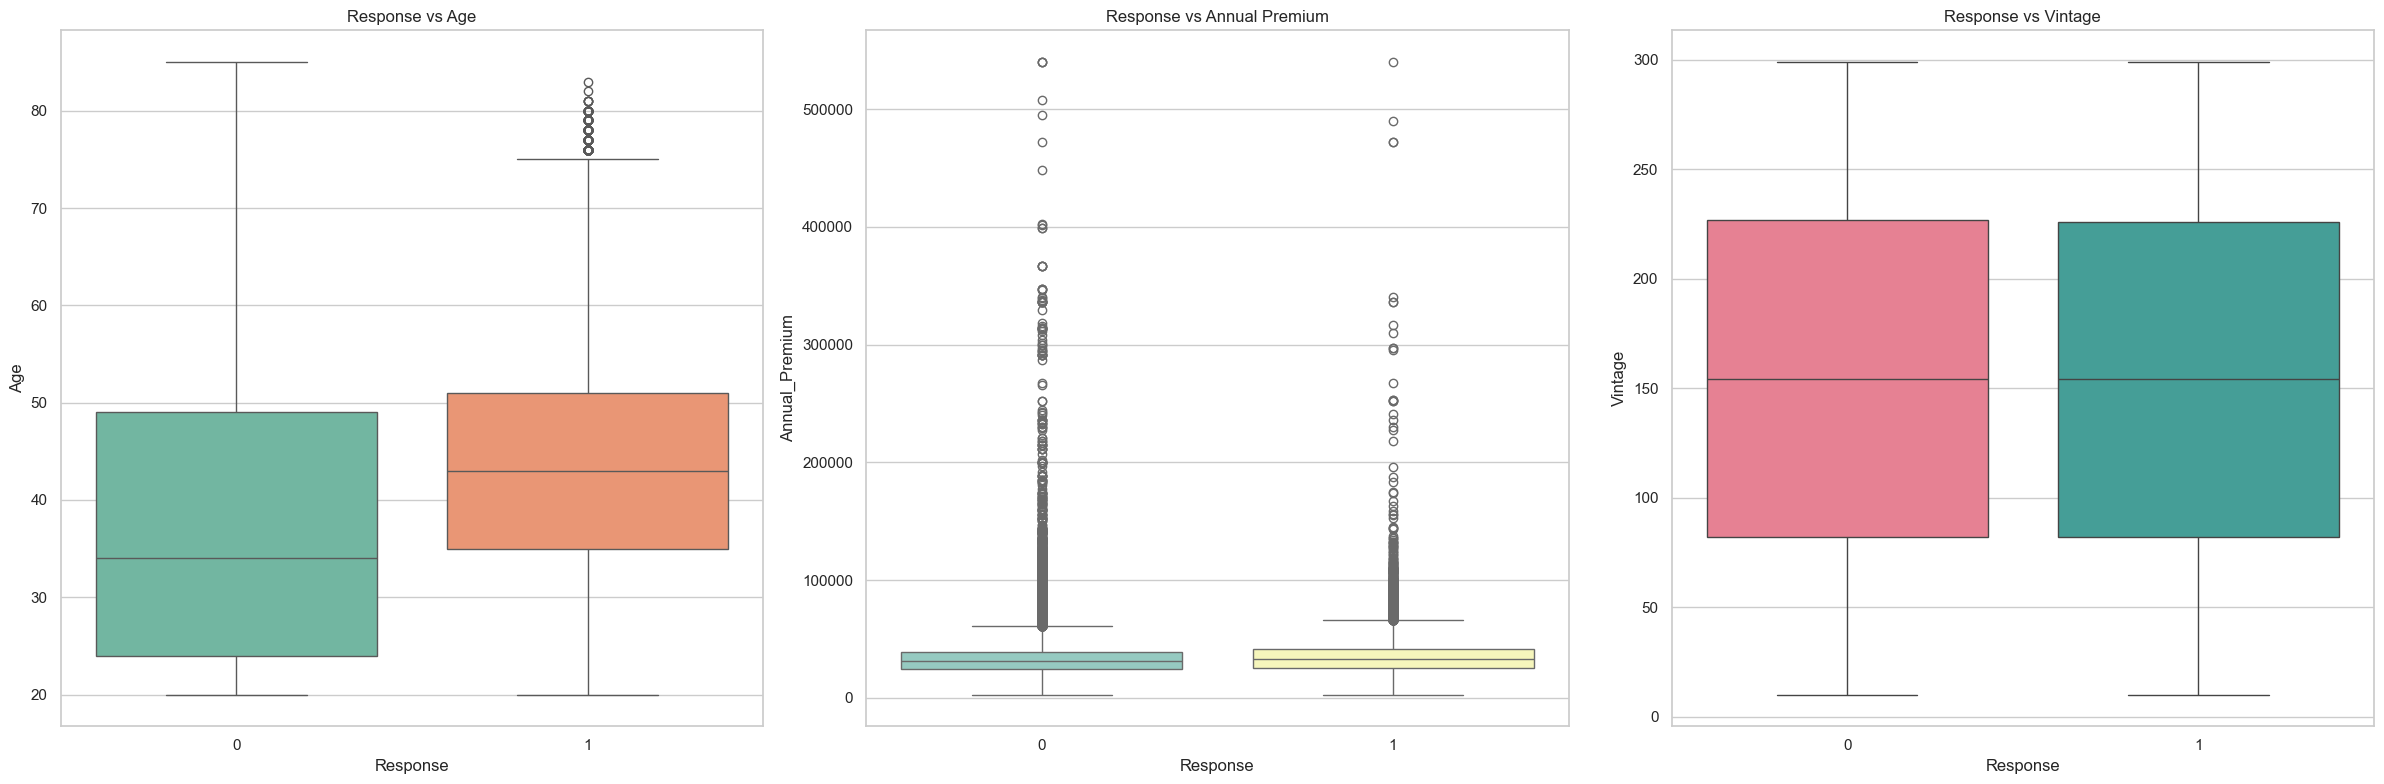

In [13]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

sns.boxplot(x='Response', y='Age', data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Response vs Age")

sns.boxplot(x='Response', y='Annual_Premium', data=df, palette="Set3", ax=axes[1])
axes[1].set_title("Response vs Annual Premium")

sns.boxplot(x='Response', y='Vintage', data=df, palette="husl", ax=axes[2])
axes[2].set_title("Response vs Vintage")

plt.tight_layout()
plt.show()

**BIVARIATE - COUNT PLOT**

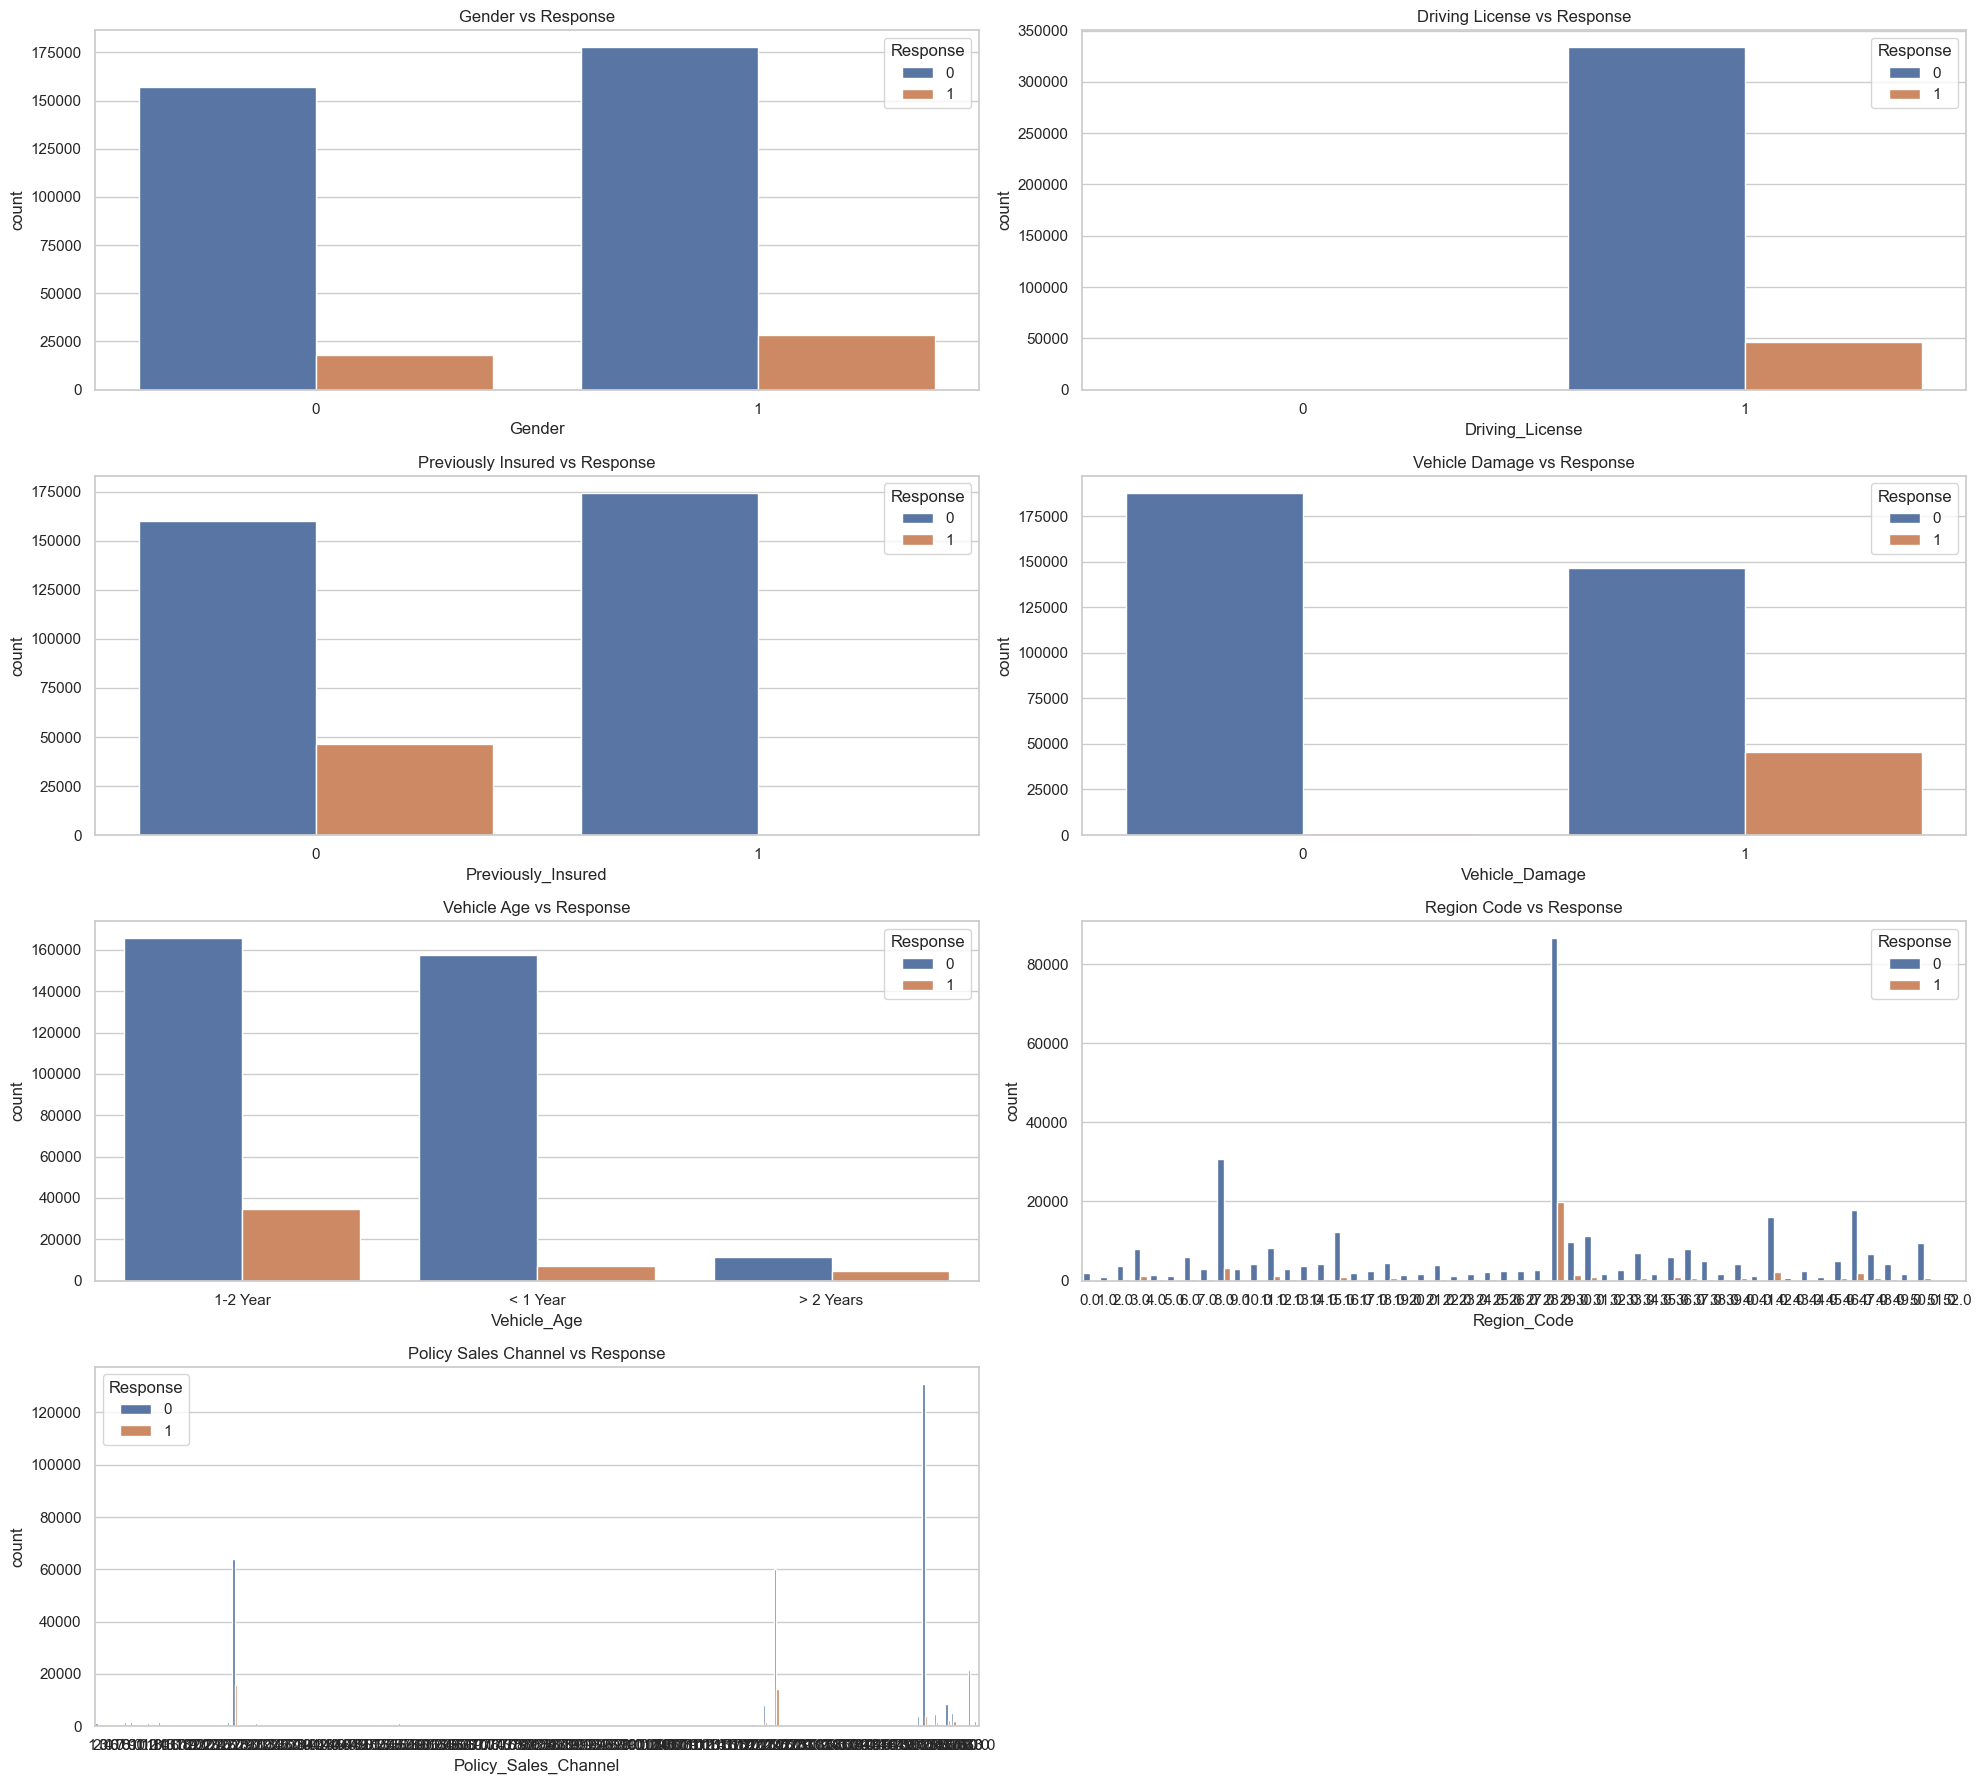

In [14]:
sns.set(style='whitegrid')

# Create subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(20, 18))

# Plot 1: Gender vs Response
sns.countplot(data=df, x='Gender', hue='Response', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Response')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('count')

# Plot 2: Driving License vs Response
sns.countplot(data=df, x='Driving_License', hue='Response', ax=axes[0, 1])
axes[0, 1].set_title('Driving License vs Response')
axes[0, 1].set_xlabel('Driving_License')
axes[0, 1].set_ylabel('count')

# Plot 3: Previously Insured vs Response
sns.countplot(data=df, x='Previously_Insured', hue='Response', ax=axes[1, 0])
axes[1, 0].set_title('Previously Insured vs Response')
axes[1, 0].set_xlabel('Previously_Insured')
axes[1, 0].set_ylabel('count')

# Plot 4: Vehicle Damage vs Response
sns.countplot(data=df, x='Vehicle_Damage', hue='Response', ax=axes[1, 1])
axes[1, 1].set_title('Vehicle Damage vs Response')
axes[1, 1].set_xlabel('Vehicle_Damage')
axes[1, 1].set_ylabel('count')

# Plot 5: Vehicle Age vs Response
sns.countplot(data=df, x='Vehicle_Age', hue='Response', ax=axes[2, 0])
axes[2, 0].set_title('Vehicle Age vs Response')
axes[2, 0].set_xlabel('Vehicle_Age')
axes[2, 0].set_ylabel('count')

# Plot 6: Region Code vs Response
sns.countplot(data=df, x='Region_Code', hue='Response', ax=axes[2, 1])
axes[2, 1].set_title('Region Code vs Response')
axes[2, 1].set_xlabel('Region_Code')
axes[2, 1].set_ylabel('count')

# Plot 7: Policy Sales Channel vs Response
sns.countplot(data=df, x='Policy_Sales_Channel', hue='Response', ax=axes[3, 0])
axes[3, 0].set_title('Policy Sales Channel vs Response')
axes[3, 0].set_xlabel('Policy_Sales_Channel')
axes[3, 0].set_ylabel('count')

# Turn off unused subplot
axes[3, 1].axis('off')
#fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()


In [15]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


**SEPARATE X & y** => IN SCIKIT LEARN, BOOSTING, IT'S BETTER TO KEEP THE TARGET FEATURE IN INT FORMAT => REAL WORLD PRACTICE

In [16]:
X = df.drop(columns='Response')
y = df['Response'].astype(int)


**TRAIN & TEST SPLIT**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

**SEPARATING NUMERIC, BINARY, ORDINAL, NOMINAL FEATURES**

In [18]:
# Numerical continuous features
num_features = [
    'Age',
    'Annual_Premium',
    'Vintage'
]

# Binary categorical features (already mapped to 0/1)
binary_features = [
    'Gender',
    'Driving_License',
    'Previously_Insured',
    'Vehicle_Damage'
]

# Ordinal categorical feature
ordinal_features = ['Vehicle_Age']

# Nominal categorical features
nominal_features = [
    'Region_Code',
    'Policy_Sales_Channel'
]

**CREATING COLUMN TRANSFORMERS FOR STATS & ML**

In [19]:
num_transformer_stats = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_transformer_stats = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(
        categories=[['< 1 Year', '1-2 Year', '> 2 Years']]
    ))
])


nominal_transformer_stats = Pipeline(steps=[
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        drop='first',
        sparse_output=False
    ))
])


In [20]:
ordinal_transformer_tree = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(
        categories=[['< 1 Year', '1-2 Year', '> 2 Years']]
    ))
])
# No dummy variables, No multicollinearity, No sparsity

from category_encoders.target_encoder import TargetEncoder


nominal_transformer_tree = Pipeline(steps=[
    ('target', TargetEncoder())
])


**PRE-PROCESSOR - STATS, SVM**

In [21]:
preprocessor_stats = ColumnTransformer(
    transformers=[
        ('num', num_transformer_stats, num_features),
        ('bin', num_transformer_stats, binary_features),
        ('ord', ordinal_transformer_stats, ordinal_features),
        ('nom', nominal_transformer_stats, nominal_features)
    ],
    remainder='drop'
)


**PRE_PROCESSOR - COMPUTATIONAL MODELS**

In [22]:
num_transformer_tree = 'passthrough'
binary_transformer_tree = 'passthrough'

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', num_transformer_tree, num_features),
        ('bin', binary_transformer_tree, binary_features),
        ('ord', ordinal_transformer_tree, ordinal_features),
        ('nom', nominal_transformer_tree, nominal_features)
    ],
    remainder='drop'
)


**LOGISTIC REGRESSION**

Logistic Regression Results
Train Accuracy: 0.6965170702588172
Test Accuracy : 0.6986565558500171

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66880
           1       0.28      0.93      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



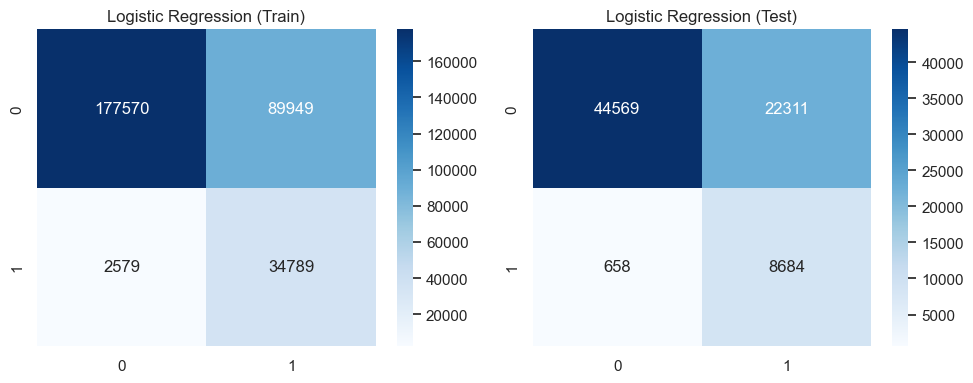

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_stats),     # stats / linear preprocessor
    ("smote", SMOTE(random_state=42)),       # imbalance handling
    ("clf", LogisticRegression(
        max_iter=1000,
        random_state=42
    ))
])

lr_pipeline.fit(X_train, y_train)

y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr  = lr_pipeline.predict(X_test)

print("Logistic Regression Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_lr))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_lr))


fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression (Test)')

plt.tight_layout()
plt.show()


**KNN**

KNN Results
Train Accuracy: 0.9998917631778331
Test Accuracy : 0.8524572957938653

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     66880
           1       0.34      0.21      0.26      9342

    accuracy                           0.85     76222
   macro avg       0.62      0.58      0.59     76222
weighted avg       0.83      0.85      0.84     76222



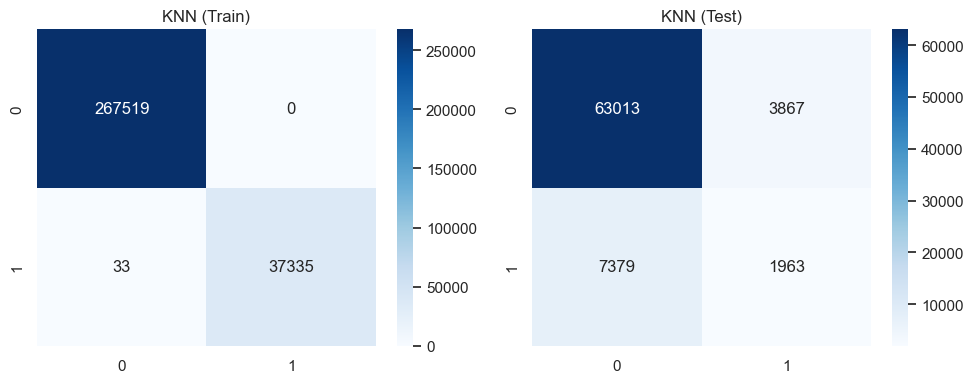

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"
)


knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_stats),
    ("model", knn_model)
    
])


knn_pipeline.fit(X_train, y_train)


y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn  = knn_pipeline.predict(X_test)


print("KNN Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_knn))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_knn))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN (Train)')

sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN (Test)')

plt.tight_layout()
plt.show()

**NAIVE-Bayes**

Naive Bayes Results
Train Accuracy: 0.463247039066933
Test Accuracy : 0.46298968801658313


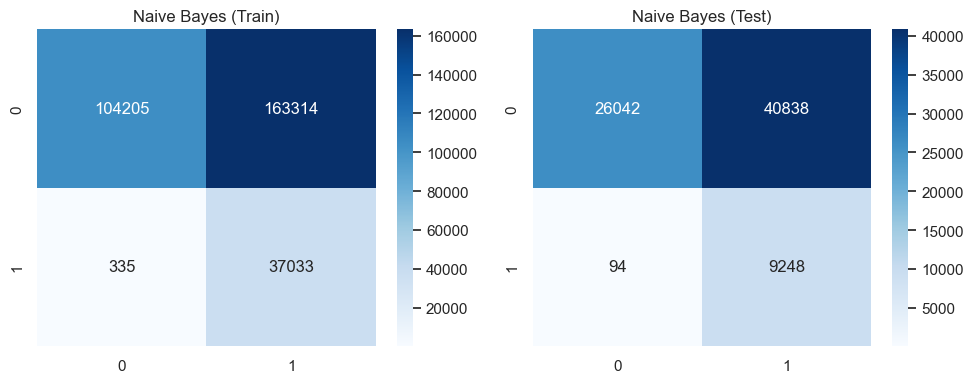

In [25]:



nb_model = GaussianNB()

nb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_stats),
    ("model", nb_model)
    
    
])

nb_pipeline.fit(X_train, y_train)

y_train_pred_nb = nb_pipeline.predict(X_train)
y_test_pred_nb  = nb_pipeline.predict(X_test)

print("Naive Bayes Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_nb))





fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes (Train)')

sns.heatmap(confusion_matrix(y_test, y_test_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Naive Bayes (Test)')

plt.tight_layout()
plt.show()


**Decision Tree**

Decision Tree Results
Train Accuracy: 0.9998917631778331
Test Accuracy : 0.8227545852903361

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66880
           1       0.29      0.31      0.30      9342

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



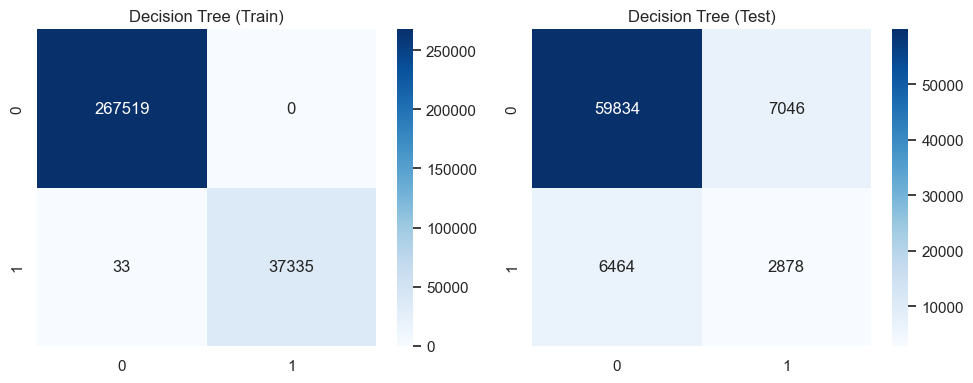

Recall: 0.30807107685720403
F1-score: 0.2987646631371328


In [26]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", dt_model)
])

# Fit
dt_pipeline.fit(X_train, y_train)

# Predict
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt  = dt_pipeline.predict(X_test)

# Metrics
print("Decision Tree Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_dt))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_dt),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_dt),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree (Test)")

plt.tight_layout()
plt.show()

# Additional metrics
print("Recall:", recall_score(y_test, y_test_pred_dt))
print("F1-score:", f1_score(y_test, y_test_pred_dt))


**BAGGING**

Bagging (Decision Tree)
Train Accuracy: 0.9998688038519189
Test Accuracy : 0.8657211828605914

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66880
           1       0.37      0.14      0.20      9342

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.83      0.87      0.84     76222



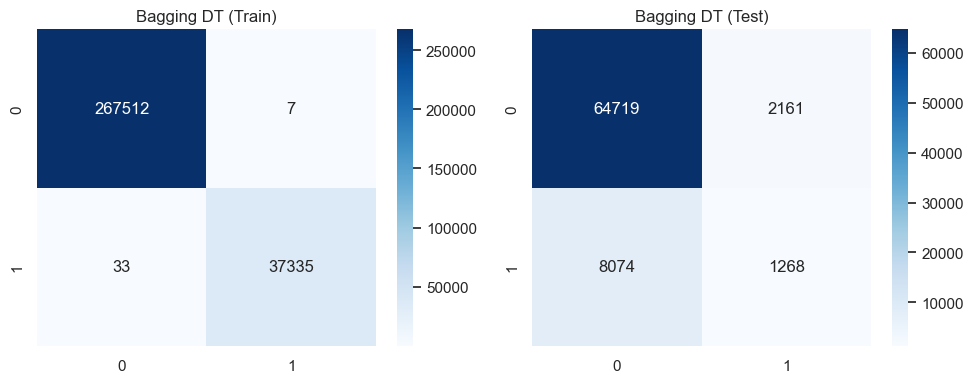

In [27]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bag_pipeline = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", bag_model)
])

bag_pipeline.fit(X_train, y_train)

y_train_pred_bag = bag_pipeline.predict(X_train)
y_test_pred_bag  = bag_pipeline.predict(X_test)

print("Bagging (Decision Tree)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_bag))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_bag))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_bag))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_bag), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Bagging DT (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_bag), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Bagging DT (Test)")

plt.tight_layout()
plt.show()


**RANDOM FOREST - NO SMOTE REQUIRED**

Random Forest + SMOTE
Train Accuracy: 0.9998917631778331
Test Accuracy : 0.8665083571672221

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      1.00      1.00     37368

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66880
           1       0.37      0.12      0.18      9342

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.87      0.84     76222



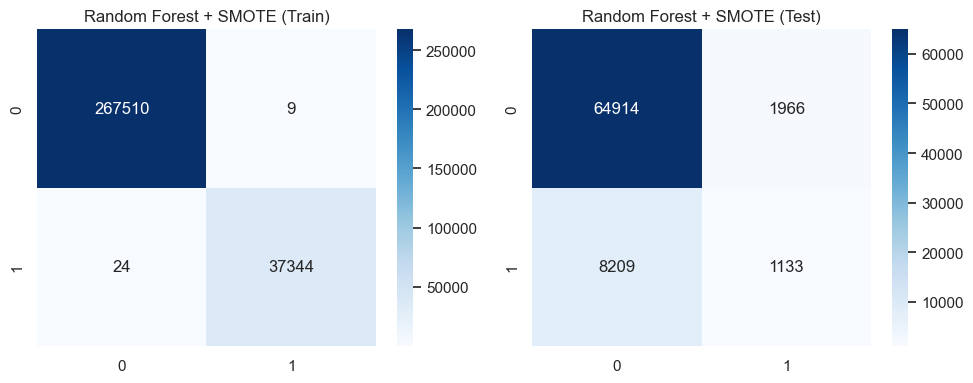

In [28]:
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

y_train_pred_rf_smote = rf_pipeline.predict(X_train)
y_test_pred_rf_smote  = rf_pipeline.predict(X_test)

print("Random Forest + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_rf_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_rf_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_rf_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest + SMOTE (Test)")
plt.tight_layout()
plt.show()

**EXTRA TREES**

Extra Trees 
Train Accuracy: 0.9998917631778331
Test Accuracy : 0.8608800608748131

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      1.00      1.00     37368

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     66880
           1       0.35      0.15      0.21      9342

    accuracy                           0.86     76222
   macro avg       0.62      0.56      0.57     76222
weighted avg       0.82      0.86      0.84     76222



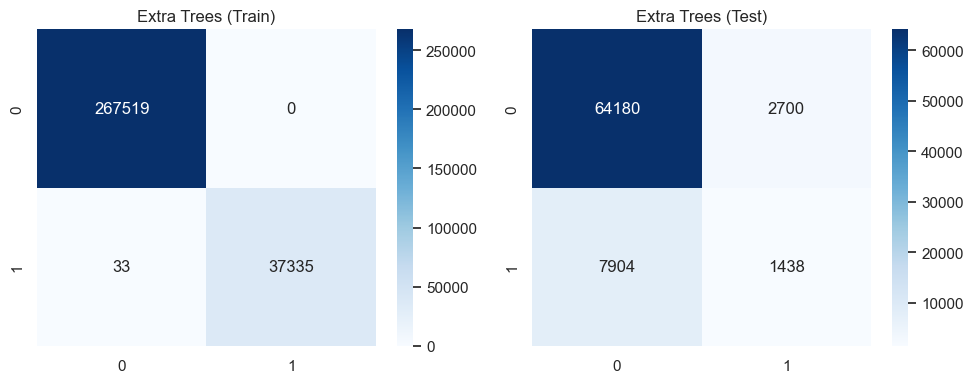

In [29]:
from sklearn.ensemble import ExtraTreesClassifier


et_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("model", ExtraTreesClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

et_pipeline.fit(X_train, y_train)

y_train_pred_et_smote = et_pipeline.predict(X_train)
y_test_pred_et_smote  = et_pipeline.predict(X_test)

print("Extra Trees ")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_et_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_et_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_et_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_et_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_et_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Extra Trees (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_et_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Extra Trees (Test)")
plt.tight_layout()
plt.show()

**ADABOOST + SMOTE**

AdaBoost (Decision Stumps)
Train Accuracy: 0.7147139759976647
Test Accuracy : 0.7160268688829997

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66880
           1       0.29      0.89      0.43      9342

    accuracy                           0.72     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.72      0.76     76222



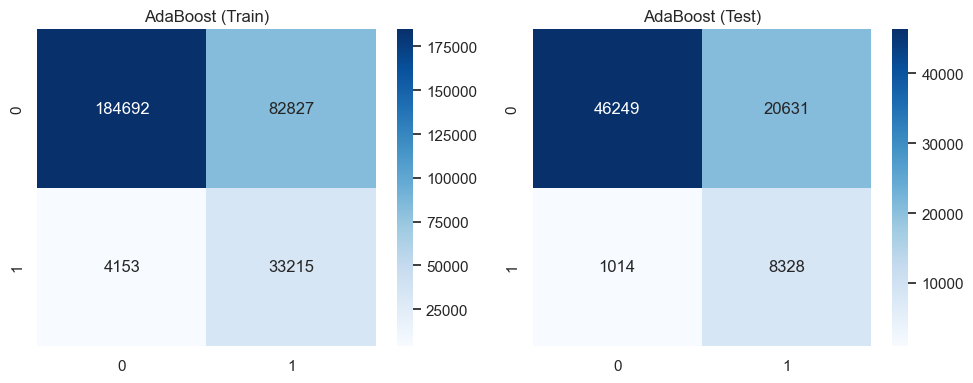

Recall (CHD = 1): 0.8914579319203597
F1-score (CHD = 1): 0.4348711521892379


In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada_base = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

ada_model = AdaBoostClassifier(
    estimator=ada_base,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_pipeline = Pipeline([
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", ada_model)
])

ada_pipeline.fit(X_train, y_train)

y_train_pred_ada = ada_pipeline.predict(X_train)
y_test_pred_ada  = ada_pipeline.predict(X_test)

print("AdaBoost (Decision Stumps)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_ada))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_ada))

**ADABOOST WITHOUT SMOTE**

**ADABOOST WITHOUT SMOTE**

AdaBoost (Decision Stumps)
Train Accuracy: 0.8774365584626436
Test Accuracy : 0.8774369604576107

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



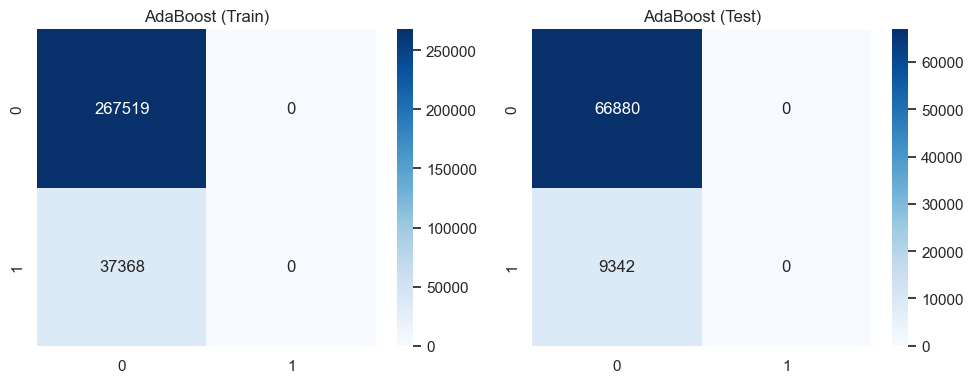

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_base1 = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

ada_model_2 = AdaBoostClassifier(
    estimator=ada_base,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_pipeline_2 = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", ada_model)
])

ada_pipeline_2.fit(X_train, y_train)

y_train_pred_ada = ada_pipeline_2.predict(X_train)
y_test_pred_ada  = ada_pipeline_2.predict(X_test)

print("AdaBoost (Decision Stumps)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")

plt.tight_layout()
plt.show()



**SMOTE helped ADAbOOST TO ACTUALLY IMPROVE F1-SCORE OF MINORITY CLASS FROM 0 TO 43%***

**GRADIENT BOOSTING**

Gradient Boosting Results
Train Accuracy: 0.8776005536477449
Test Accuracy : 0.8774500800293878

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.51      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222



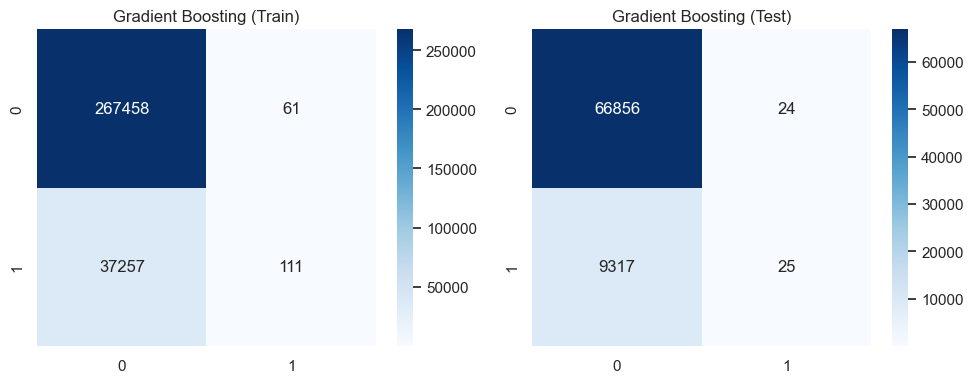

Recall (CHD = 1): 0.002676086491115393
F1-score (CHD = 1): 0.0053242466191033965


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_pipeline = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", gb_model)
])

gb_pipeline.fit(X_train, y_train)

y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb  = gb_pipeline.predict(X_test)

print("Gradient Boosting Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_gb))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_gb))

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Gradient Boosting (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Gradient Boosting (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_gb))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_gb))

**GRADIENT BOOSTING + SMOTE**

Gradient Boosting Results
Train Accuracy: 0.842544942880477
Test Accuracy : 0.8406365616226287

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     66880
           1       0.34      0.32      0.33      9342

    accuracy                           0.84     76222
   macro avg       0.62      0.62      0.62     76222
weighted avg       0.84      0.84      0.84     76222



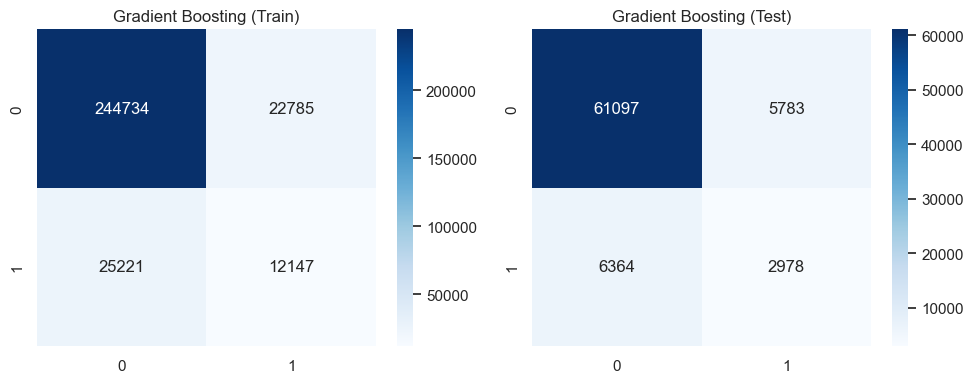

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model_1 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_pipeline_2 = Pipeline([
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", gb_model)
])

gb_pipeline_2.fit(X_train, y_train)

y_train_pred_gb = gb_pipeline_2.predict(X_train)
y_test_pred_gb  = gb_pipeline_2.predict(X_test)

print("Gradient Boosting Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_gb))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_gb))

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Gradient Boosting (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Gradient Boosting (Test)")

plt.tight_layout()
plt.show()



**SVM + SMOTE**

**SVM WITHOUT SMOTE**

**Voting Classifier - All Baseline Models - f1 classification is really poor, DT & LR can perform good single handedly**

Voting Classifier Results
Train Accuracy: 0.9995867321335445
Test Accuracy : 0.8141875049198394

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     66880
           1       0.31      0.44      0.37      9342

    accuracy                           0.81     76222
   macro avg       0.62      0.65      0.63     76222
weighted avg       0.84      0.81      0.83     76222



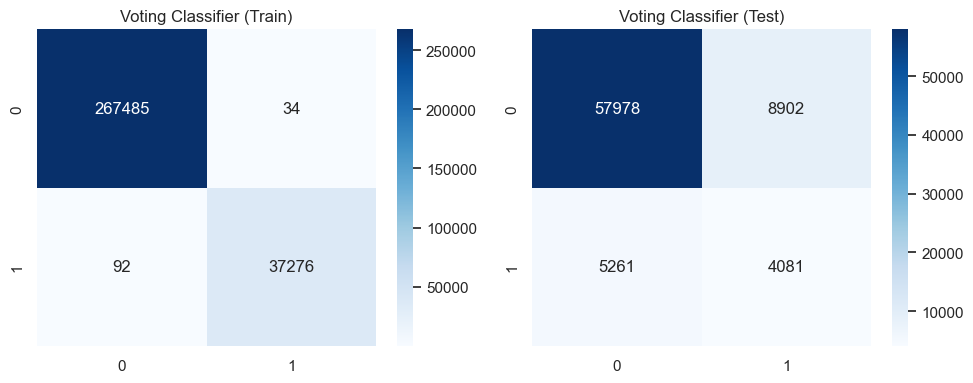

In [32]:
from sklearn.ensemble import VotingClassifier


dt_pipeline_1 = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=3,
        random_state=42
    ))
])

voting_clf = VotingClassifier(
    estimators=[
        ("lr", lr_pipeline),
        ("knn", knn_pipeline),
        ("nb", nb_pipeline),
        ("dt_entropy", dt_pipeline_1),
        ("dt_gini_5", dt_pipeline)
    ],
    voting="soft"
)

voting_clf.fit(X_train, y_train)

y_train_pred_vc = voting_clf.predict(X_train)
y_test_pred_vc  = voting_clf.predict(X_test)

print("Voting Classifier Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_vc))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_vc))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_vc))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Voting Classifier (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Voting Classifier (Test)")

plt.tight_layout()
plt.show()


**We'll try using LR & DT alone, to check whether we are able find the distinction between classes**

Voting Classifier Results
Train Accuracy: 0.9958082830688091
Test Accuracy : 0.8278318595681037

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.30      0.31      0.30      9342

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



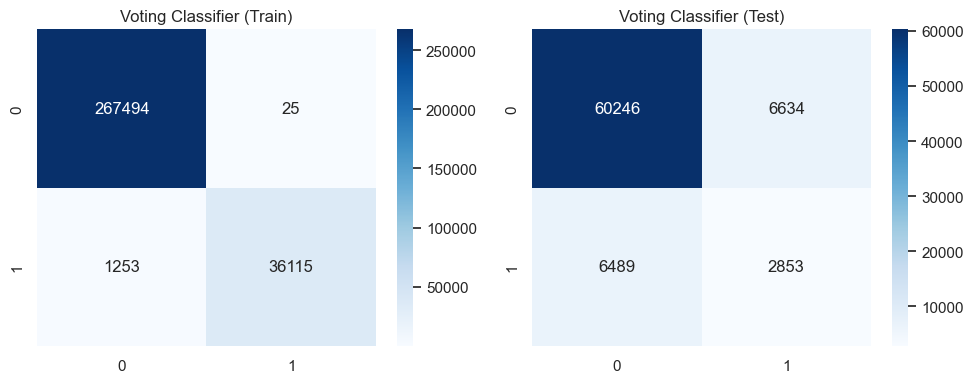

In [37]:
from sklearn.ensemble import VotingClassifier


dt_pipeline_1 = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=3,
        random_state=42
    ))
])

voting_clf_1 = VotingClassifier(
    estimators=[
        ("lr", lr_pipeline),
        ("dt_entropy", dt_pipeline_1),
        ("dt_gini_5", dt_pipeline)
    ],
    voting="soft"
)

voting_clf_1.fit(X_train, y_train)

y_train_pred_vc = voting_clf_1.predict(X_train)
y_test_pred_vc  = voting_clf_1.predict(X_test)

print("Voting Classifier Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_vc))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_vc))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_vc))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Voting Classifier (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Voting Classifier (Test)")

plt.tight_layout()
plt.show()


**CLEAR OVERFITTING, GENERALISATION IS ALSO POOR, LACK OF STABILITY**

# K-FOLD CV

**LET'S USE A VALIDATION ESTIMATOR TO PREDICT WHICH MODEL IS PERFORMING BETTER**

In [41]:


cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)



models = {
    "Logistic Regression (SMOTE)": lr_pipeline,
    "KNN": knn_pipeline,
    "Naive Bayes": nb_pipeline,

    "Decision Tree (ENTROPY)": dt_pipeline_1,
    "Decision Tree (GINI)": dt_pipeline,
    "Bagging (Decision Tree)": bag_pipeline,
    "AdaBoost (Decision Stumps)": ada_pipeline,
    "Random Forest": rf_pipeline,
    "Extra Trees": et_pipeline,
    "Gradient Boosting": gb_pipeline_2,

    "Voting Classifier": voting_clf
}



cv_results = []

for model_name, pipeline in models.items():

    # Cross-validated F1 score (positive class = CHD = 1)
    cv_f1_scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )

    # Fit model on full training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred  = pipeline.predict(X_test)

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    cv_results.append({
        "Model": model_name,
        "Mean CV F1": cv_f1_scores.mean(),
        "Std CV F1": cv_f1_scores.std(),
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1": train_f1,
        "Test F1": test_f1
    })


cv_summary = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV F1", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary)


,Model,Mean CV F1,Std CV F1,Train Accuracy,Test Accuracy,Train F1,Test F1
6,AdaBoost (Decision Stumps),0.4363,0.0025,0.7147,0.7160,0.4330,0.4349
0,Logistic Regression (SMOTE),0.4282,0.0018,0.6965,0.6987,0.4292,0.4306
9,Gradient Boosting,0.3322,0.0083,0.8425,0.8406,0.3360,0.3290
10,Voting Classifier,0.3118,0.0023,0.9958,0.8278,0.9826,0.3030
4,Decision Tree (GINI),0.3081,0.0022,0.9999,0.8228,0.9996,0.2988
2,Naive Bayes,0.2714,0.0276,0.4632,0.4630,0.3116,0.3112
1,KNN,0.2516,0.0062,0.9999,0.8525,0.9996,0.2588
8,Extra Trees,0.2161,0.0034,0.9999,0.8609,0.9996,0.2134
5,Bagging (Decision Tree),0.2004,0.0040,0.9999,0.8657,0.9995,0.1986
7,Random Forest,0.1855,0.0028,0.9999,0.8665,0.9996,0.1821


**BASED ON F1 MEAN CV = TEST CV IS VERY HIGH, TRAINING AND TEST ACCURACY IS  COMPARITIVELY WELL**

**BETTER GENERLISATION, NO OVERFITTING, F1 IS HIGHEST FOR ADABOOST, LET'S TRY TO DO GRIDSEARCH TO IMPROVE ACCURACY & f1 TO THE FULLEST**

# TUNING

In [44]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# AdaBoost Classifier
ada_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

# Parameter grid including None for max_depth
ada_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 1.0],
    "model__estimator__max_depth": [1, 2, 3]
}

# GridSearchCV setup
ada_grid = GridSearchCV(
    estimator=ada_smote_pipeline,
    param_grid=ada_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Fit on training data
ada_grid.fit(X_train, y_train)

# Convert results to DataFrame
ada_grid_results = pd.DataFrame(ada_grid.cv_results_)




Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [45]:
# Display best parameters and CV 

print("Best Parameters:")
print(ada_grid.best_params_)

print("Best CV Accuracy:")
print(ada_grid.best_score_)

Best Parameters:
{'model__estimator__max_depth': 3, 'model__learning_rate': 1.0, 'model__n_estimators': 200}
Best CV Accuracy:
0.8547953879638523


**AdaBosst + SMOTE + Tuning**

AdaBoost (Decision Stumps)
Train Accuracy: 0.8520993023644826
Test Accuracy : 0.8512240560468106

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     66880
           1       0.36      0.27      0.30      9342

    accuracy                           0.85     76222
   macro avg       0.63      0.60      0.61     76222
weighted avg       0.83      0.85      0.84     76222



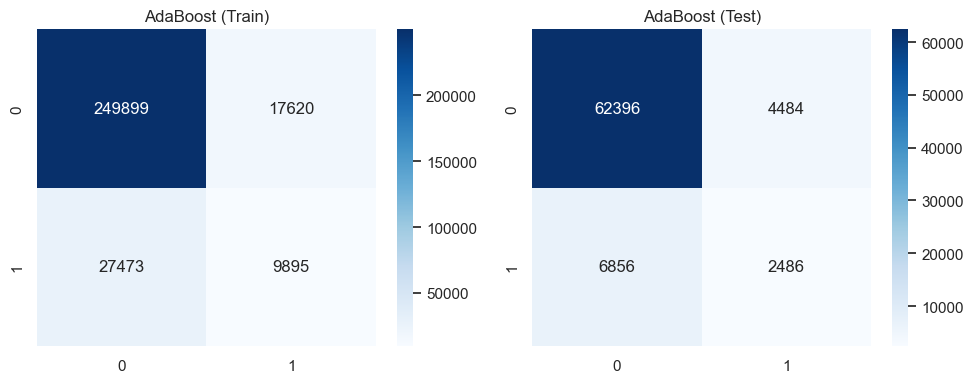

Recall (CHD = 1): 0.26611004067651467
F1-score (CHD = 1): 0.3048062775870525


In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_base = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

ada_model = AdaBoostClassifier(
    estimator=ada_base,
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)

ada_pipeline = Pipeline([
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", ada_model)
])

ada_pipeline.fit(X_train, y_train)

y_train_pred_ada = ada_pipeline.predict(X_train)
y_test_pred_ada  = ada_pipeline.predict(X_test)

print("AdaBoost (Decision Stumps)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_ada))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_ada))

# chatgpt code => for increasing f1 score

AdaBoost (F1-Optimized, SMOTE)
Best Threshold: 0.5200000000000001

Train Accuracy: 0.7595043409525496
Test Accuracy : 0.7594920101807877

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.96      0.75      0.85     66880
           1       0.31      0.80      0.45      9342

    accuracy                           0.76     76222
   macro avg       0.64      0.78      0.65     76222
weighted avg       0.88      0.76      0.80     76222

Recall : 0.7962962962962963
F1-score : 0.447997591087022


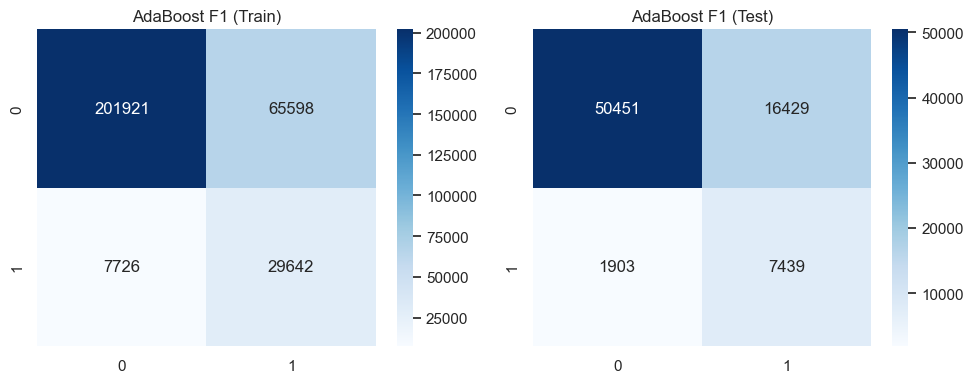

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,
    f1_score
)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# =========================
# NEW ADA MODEL (F1-OPTIMIZED, NO SAMPLE WEIGHTS)
# =========================

ada_base_f1 = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)

ada_model_f1 = AdaBoostClassifier(
    estimator=ada_base_f1,
    n_estimators=400,
    learning_rate=0.05,
    random_state=42
)

ada_pipeline_f1 = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", ada_model_f1)
])

# =========================
# FIT MODEL
# =========================

ada_pipeline_f1.fit(X_train, y_train)

# =========================
# THRESHOLD TUNING (F1)
# =========================

y_test_proba_f1 = ada_pipeline_f1.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.02)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_test_proba_f1 >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_threshold_f1 = thresholds[np.argmax(f1_scores)]

# =========================
# FINAL PREDICTIONS
# =========================

y_train_pred_f1 = (
    ada_pipeline_f1.predict_proba(X_train)[:, 1] >= best_threshold_f1
).astype(int)

y_test_pred_f1 = (
    y_test_proba_f1 >= best_threshold_f1
).astype(int)

# =========================
# METRICS
# =========================

print("AdaBoost (F1-Optimized, SMOTE)")
print("Best Threshold:", best_threshold_f1)

print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred_f1))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_f1))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_f1))

print("Recall :", recall_score(y_test, y_test_pred_f1))
print("F1-score :", f1_score(y_test, y_test_pred_f1))

# =========================
# CONFUSION MATRICES
# =========================

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(
    confusion_matrix(y_train, y_train_pred_f1),
    annot=True, fmt="d", cmap="Blues", ax=axes[0]
)
axes[0].set_title("AdaBoost F1 (Train)")

sns.heatmap(
    confusion_matrix(y_test, y_test_pred_f1),
    annot=True, fmt="d", cmap="Blues", ax=axes[1]
)
axes[1].set_title("AdaBoost F1 (Test)")

plt.tight_layout()
plt.show()
